In [109]:
import random
import faker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def get_gaussian_value(min_num, max_num, media, std_dev):
    while True:
        val = random.gauss(media, std_dev)
        if val>=min_num and val<=max_num:
            return val

In [111]:
def data_generator():
    rows = []
    for i in range(10000):
        row_dict = {}
        
        row_dict['embalaje'] = random.choice(['A', 'B', 'C'])
        row_dict['largo'] = get_gaussian_value(5, 100, 50, 15)
        row_dict['ancho'] = get_gaussian_value(5, 100, 50, 15)
        row_dict['alto'] = get_gaussian_value(5, 100, 50, 15)
        row_dict['peso'] = get_gaussian_value(5, 100, 50, 15)
        row_dict['procedencia'] = random.choice(['A', 'B', 'C', 'D'])
        
        # 20% es refrigerado
        if random.random() <= 0.2:
            row_dict['temperatura'] = 'refrigerado'
        else:
            row_dict['temperatura'] = 'ambiente'
            
        # 20% es fragil independientemente de la temperatura
        if random.random() <= 0.2:
            row_dict['manipulacion'] = 'fragil'
        else:
            # si la temperatura es refrigerado entonces la manipulacion es fragil
            if row_dict['temperatura'] == 'refrigerado':
                row_dict['manipulacion'] = 'fragil'
            else:
                row_dict['manipulacion'] = 'normal'
            
        
        
        # etiquetado del protocolo
        volumen = row_dict['largo'] * row_dict['ancho'] * row_dict['alto']
        if volumen <= 3375 or row_dict['manipulacion'] == 'fragil':
            row_dict['protocolo'] = 'protocolo_1'
        else:
            row_dict['protocolo'] = 'protocolo_2'

        
        
        rows.append(row_dict)
        
    return rows

data_dict = data_generator()

In [112]:
df = pd.DataFrame.from_records(data_dict)
df

,embalaje,largo,ancho,alto,peso,procedencia,temperatura,manipulacion,protocolo
0,C,55.740528,49.127133,68.215588,61.919486,C,ambiente,fragil,protocolo_1
1,C,54.391537,28.078693,29.405791,42.019218,D,ambiente,fragil,protocolo_1
2,A,33.220636,51.449980,44.906200,55.571046,A,ambiente,normal,protocolo_2
3,B,47.149550,46.729923,46.393705,48.390267,D,refrigerado,fragil,protocolo_1
4,A,34.386578,17.727098,58.454073,57.351910,C,ambiente,normal,protocolo_2
...,...,...,...,...,...,...,...,...,...
9995,C,58.531923,62.918930,35.978531,42.626943,B,ambiente,normal,protocolo_2
9996,A,75.355013,80.474789,37.376208,57.750952,D,ambiente,normal,protocolo_2
9997,C,44.149835,47.873174,64.199464,28.795871,C,refrigerado,fragil,protocolo_1
9998,C,65.618363,97.064587,26.709792,57.104619,C,refrigerado,fragil,protocolo_1


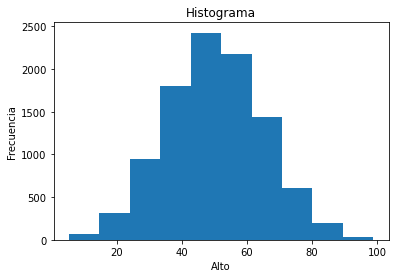

In [113]:
arr = np.array(df['alto'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Alto')
plt.title('Histograma')
plt.show()


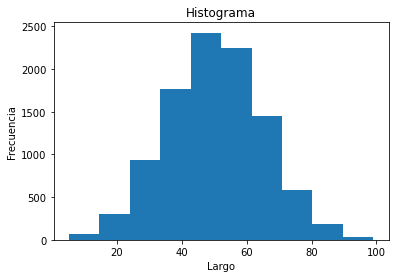

In [114]:
arr = np.array(df['largo'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Largo')
plt.title('Histograma')
plt.show()

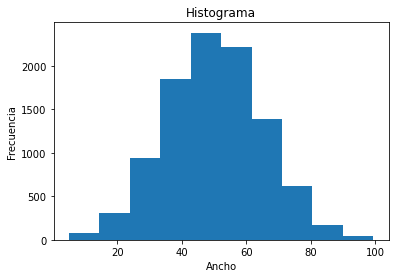

In [115]:
arr = np.array(df['ancho'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Ancho')
plt.title('Histograma')
plt.show()

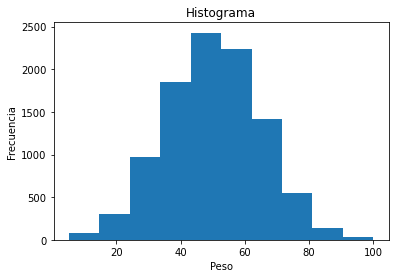

In [116]:
arr = np.array(df['peso'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Peso')
plt.title('Histograma')
plt.show()

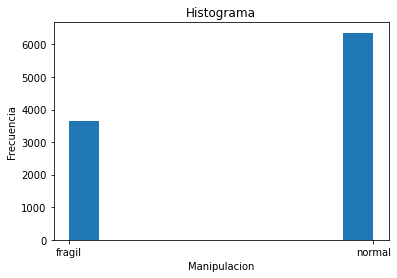

In [117]:
arr = np.array(df['manipulacion'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Manipulacion')
plt.title('Histograma')
plt.show()

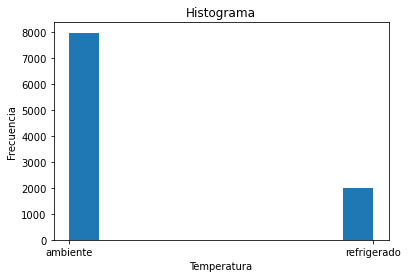

In [118]:
arr = np.array(df['temperatura'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Temperatura')
plt.title('Histograma')
plt.show()

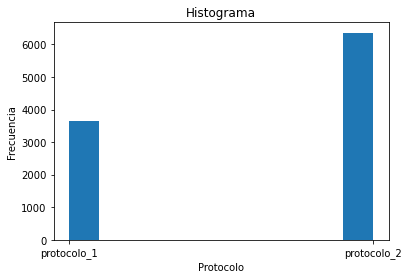

In [119]:
arr = np.array(df['protocolo'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Protocolo')
plt.title('Histograma')
plt.show()